In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scvelo as scv
import plotly.express as px

In [7]:
adata = scv.read('/Volumes/fsmresfiles/Radiation_Oncology/Abazeed_Lab/CC_Data/Priyanka/scRNAseq/loom_files/possorted_genome_bam_YMCD1.loom')
adata.var_names_make_unique()

In [8]:
sc.settings.set_figure_params(dpi=150, dpi_save=150,facecolor='white')

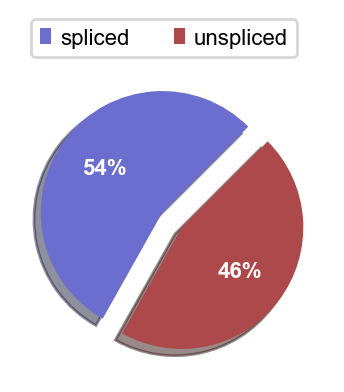

AnnData object with n_obs × n_vars = 5332 × 36601
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'

In [9]:
scv.pl.proportions(adata)
adata 

In [10]:
scv.pp.filter_genes(adata, min_cells=3)
scv.pp.normalize_per_cell(adata,enforce=True)
scv.pp.filter_genes_dispersion(adata, n_top_genes=2000)
scv.pp.log1p(adata)

Filtered out 15270 genes that are detected in less than 3 cells (spliced).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.


In [12]:
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

computing neighbors
    finished (0:00:28) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


computing velocities
    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/8 cores)


  0%|          | 0/5332 [00:00<?, ?cells/s]

    finished (0:00:08) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
scanpy==1.9.1 anndata==0.8.0 umap==0.4.6 numpy==1.21.5 scipy==1.7.3 pandas==1.4.2 scikit-learn==1.0.2 statsmodels==0.13.2 python-igraph==0.9.11 louvain==0.7.1 pynndescent==0.5.7
computing velocity embedding
    finished (0:00:01) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)


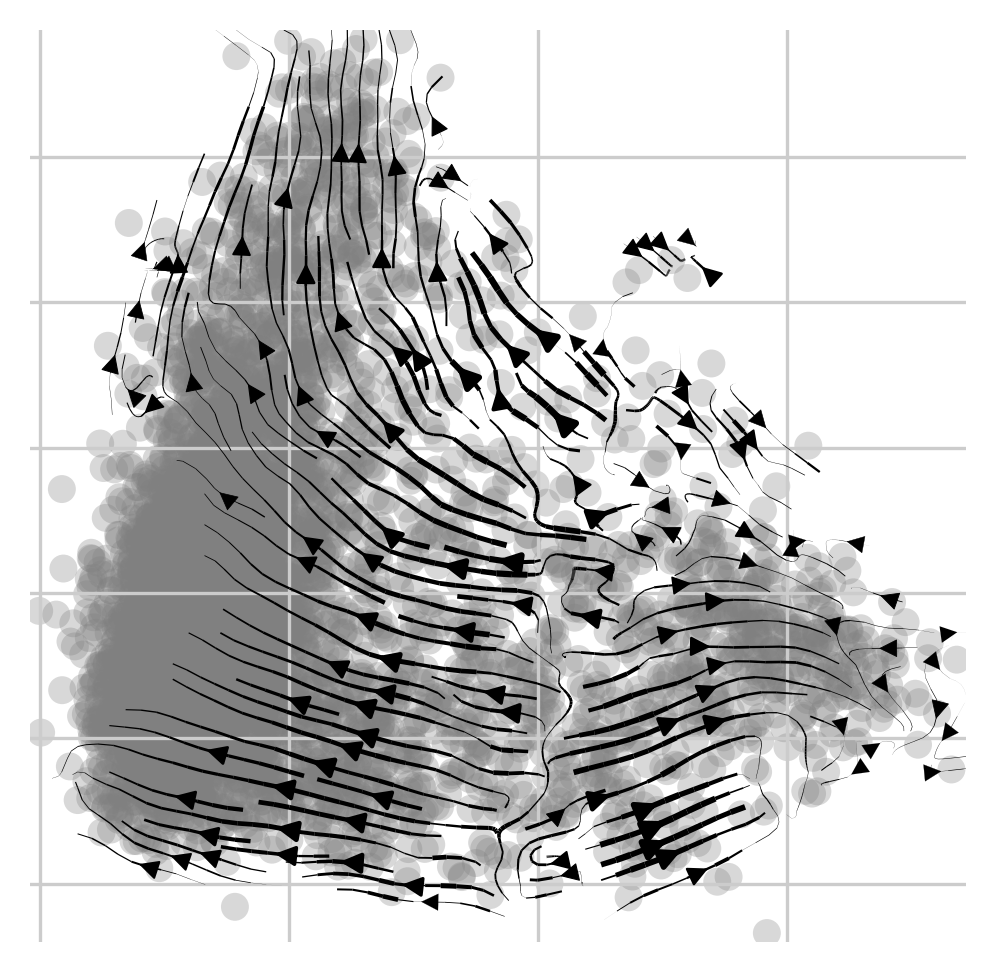

In [13]:
scv.tl.velocity_graph(adata)
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=150, dpi_save=150,facecolor='white')
sc.logging.print_header()
scv.pl.velocity_embedding_stream(adata)

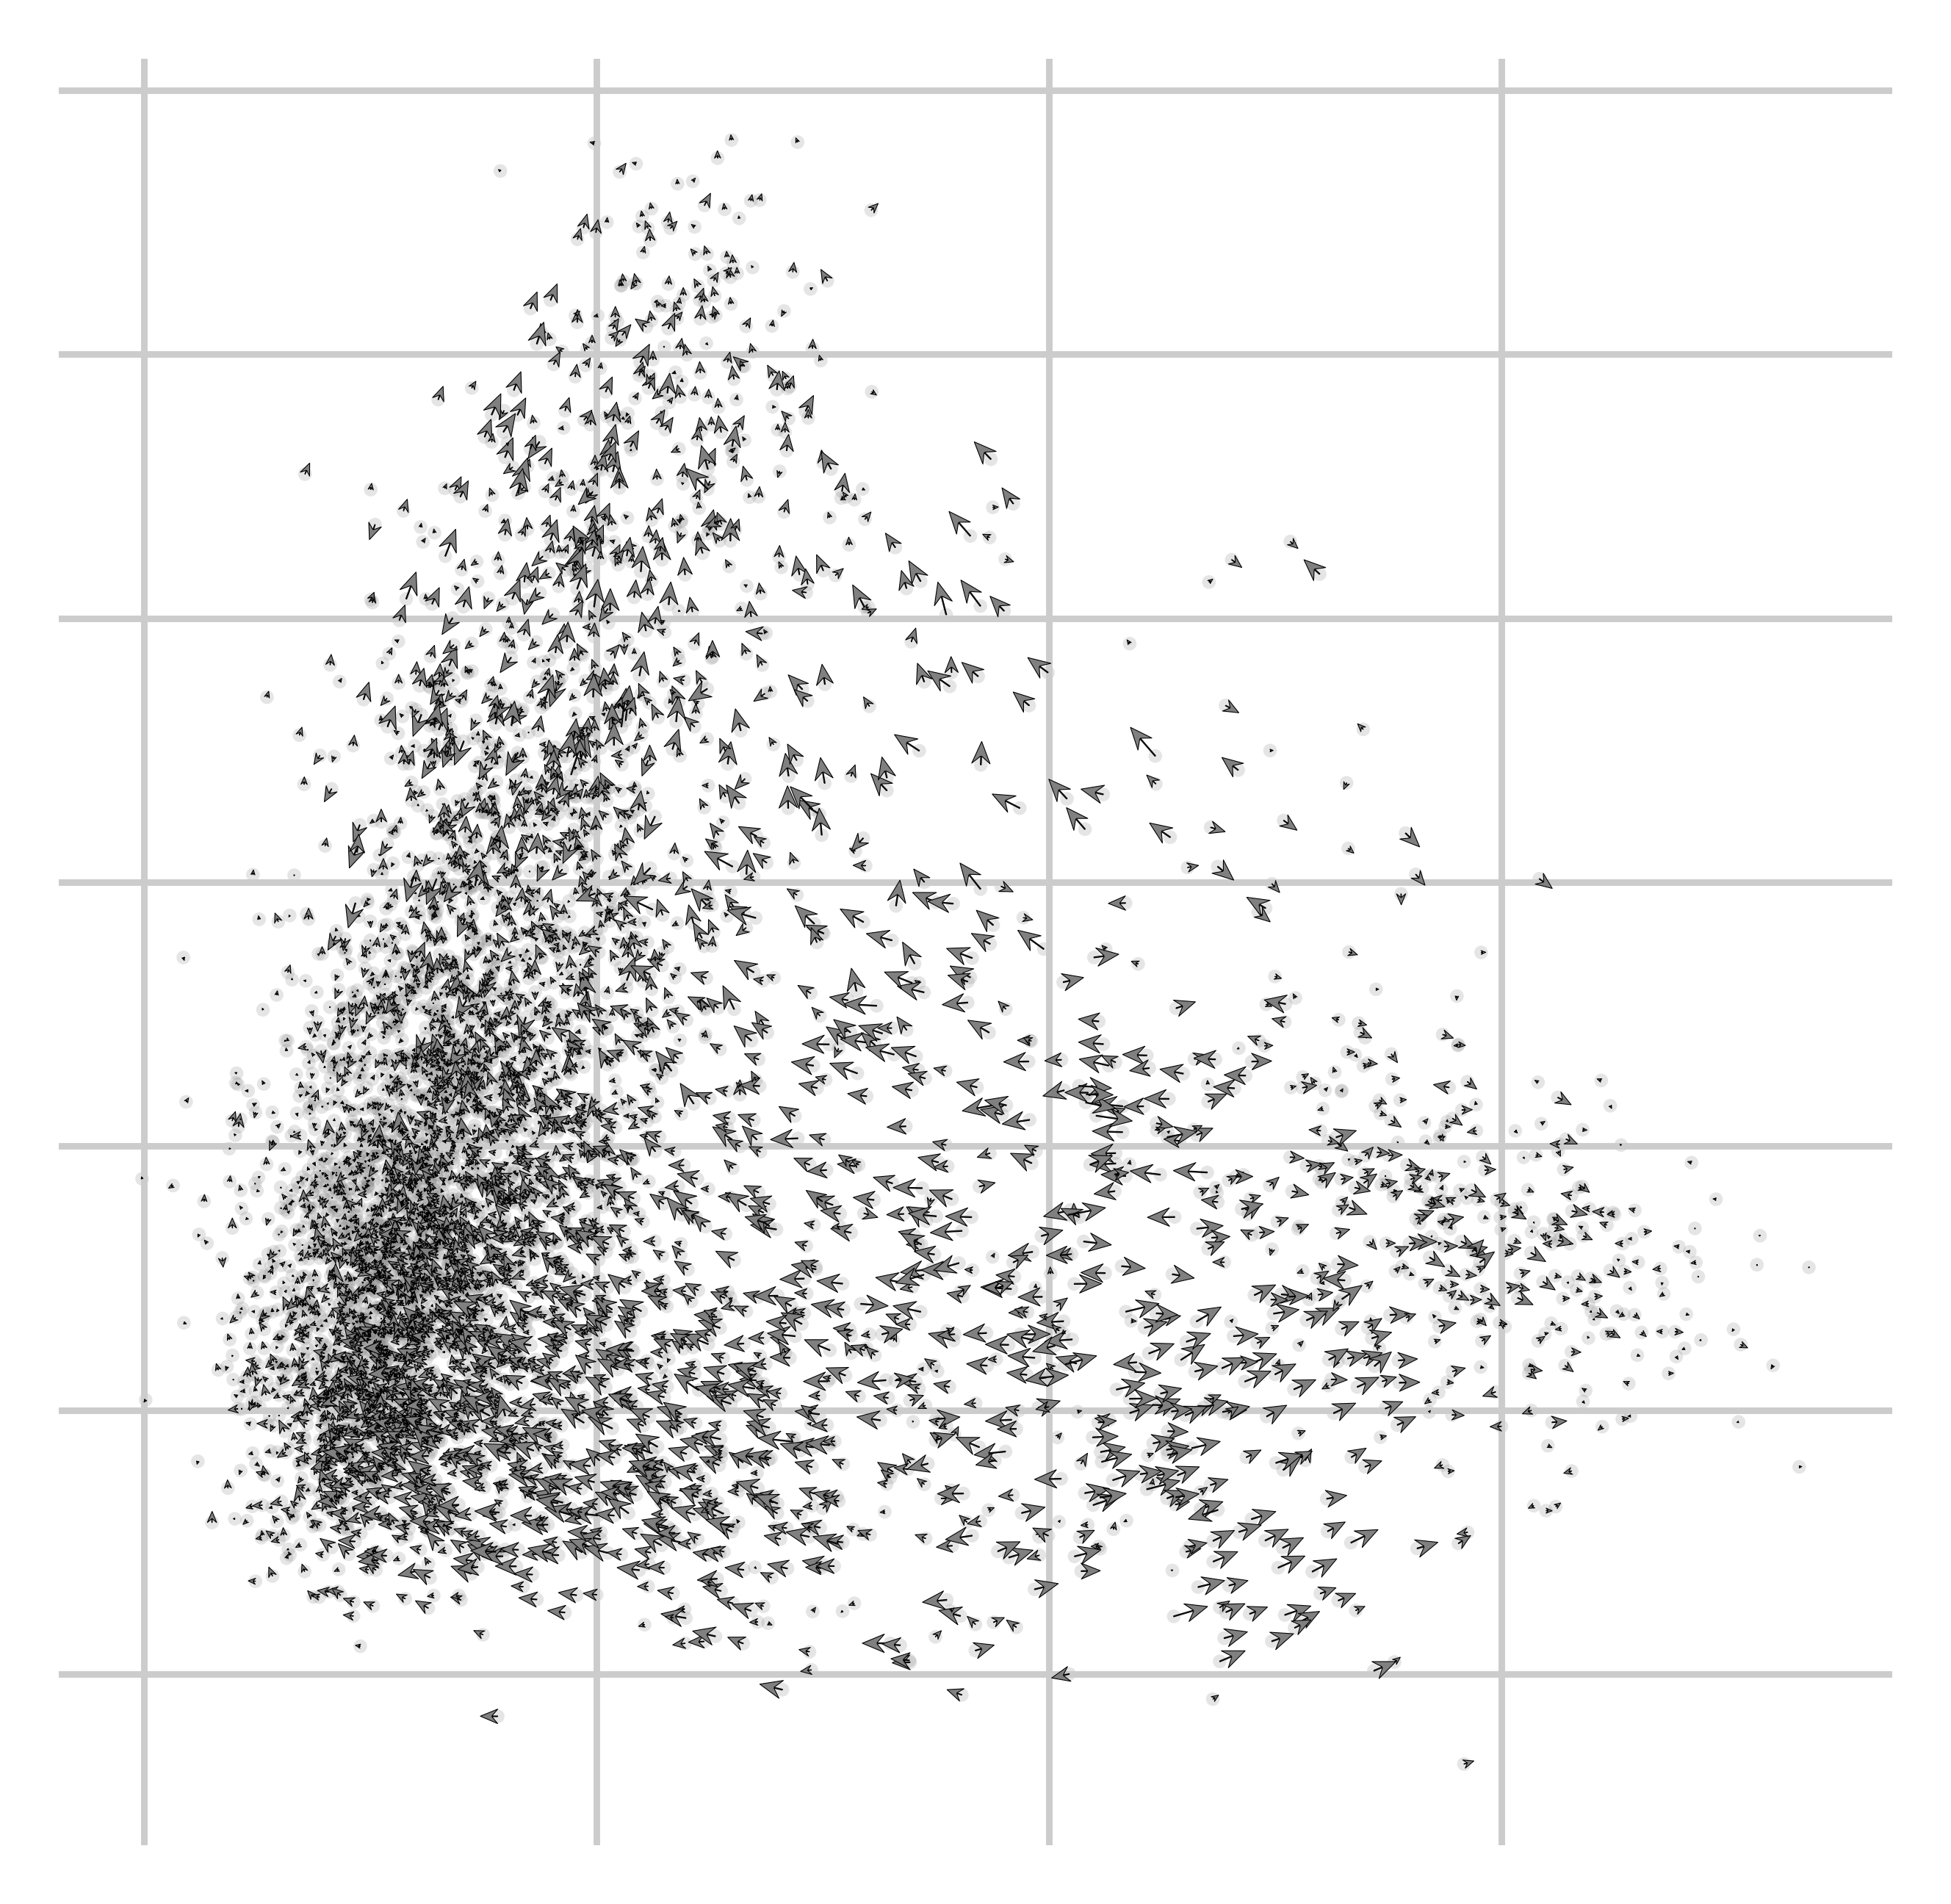

In [16]:
scv.pl.velocity_embedding(adata, arrow_length=3, arrow_size=2, dpi=400)

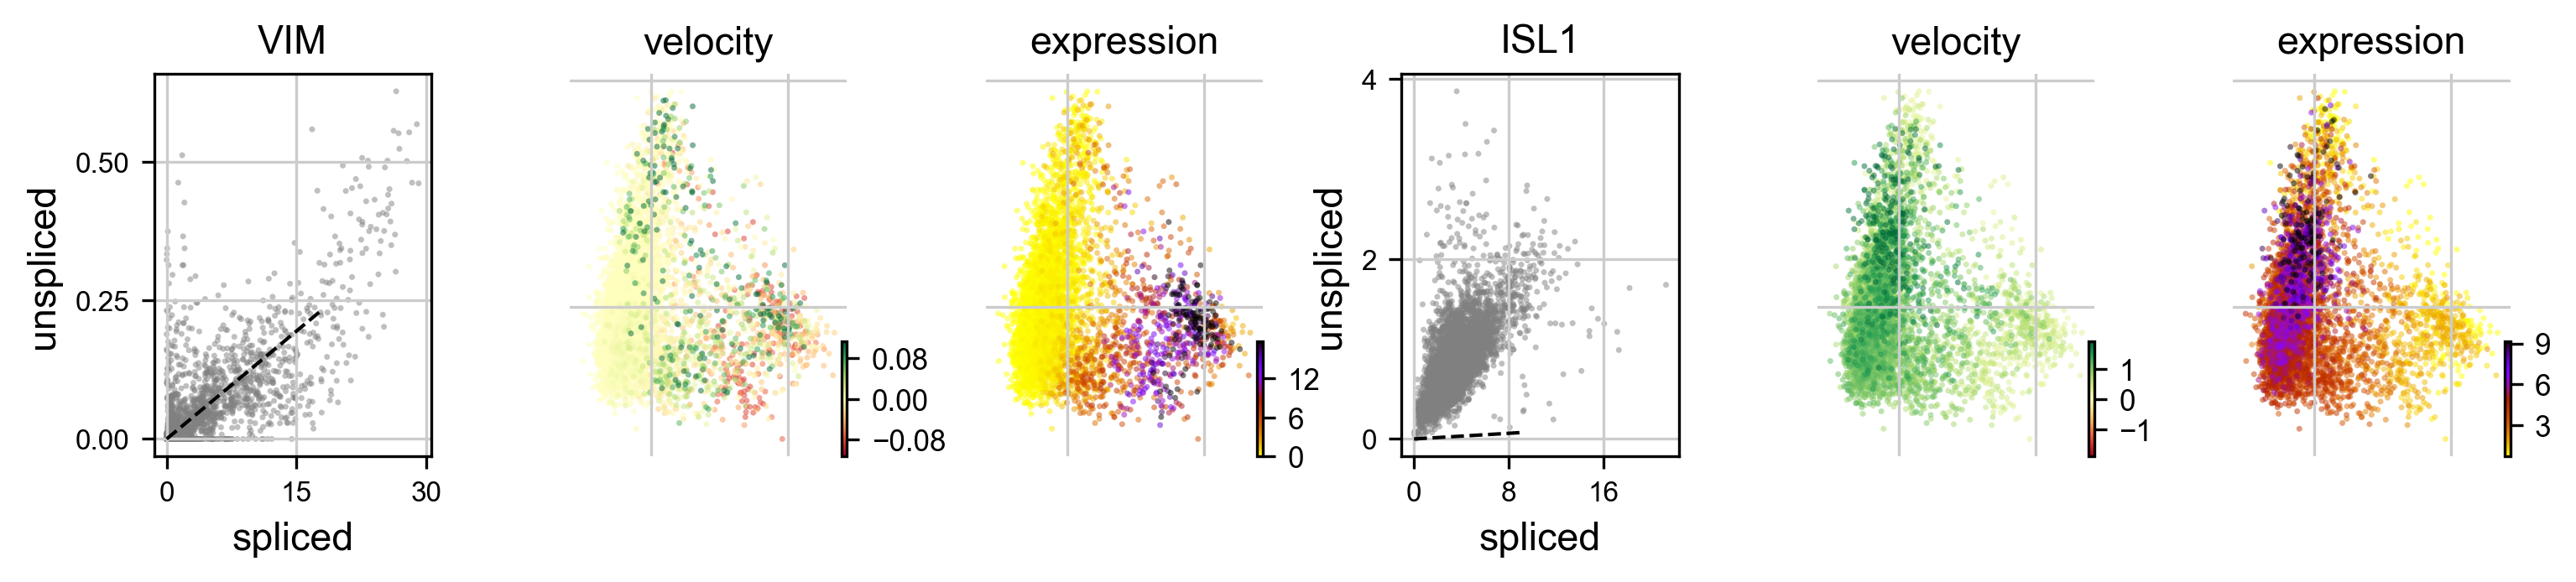

In [31]:
scv.pl.velocity(adata, ['VIM','ISL1'], ncols=2)

calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    9 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    6 total control genes are used. (0:00:00)
-->     'S_score' and 'G2M_score', scores of cell cycle phases (adata.obs)


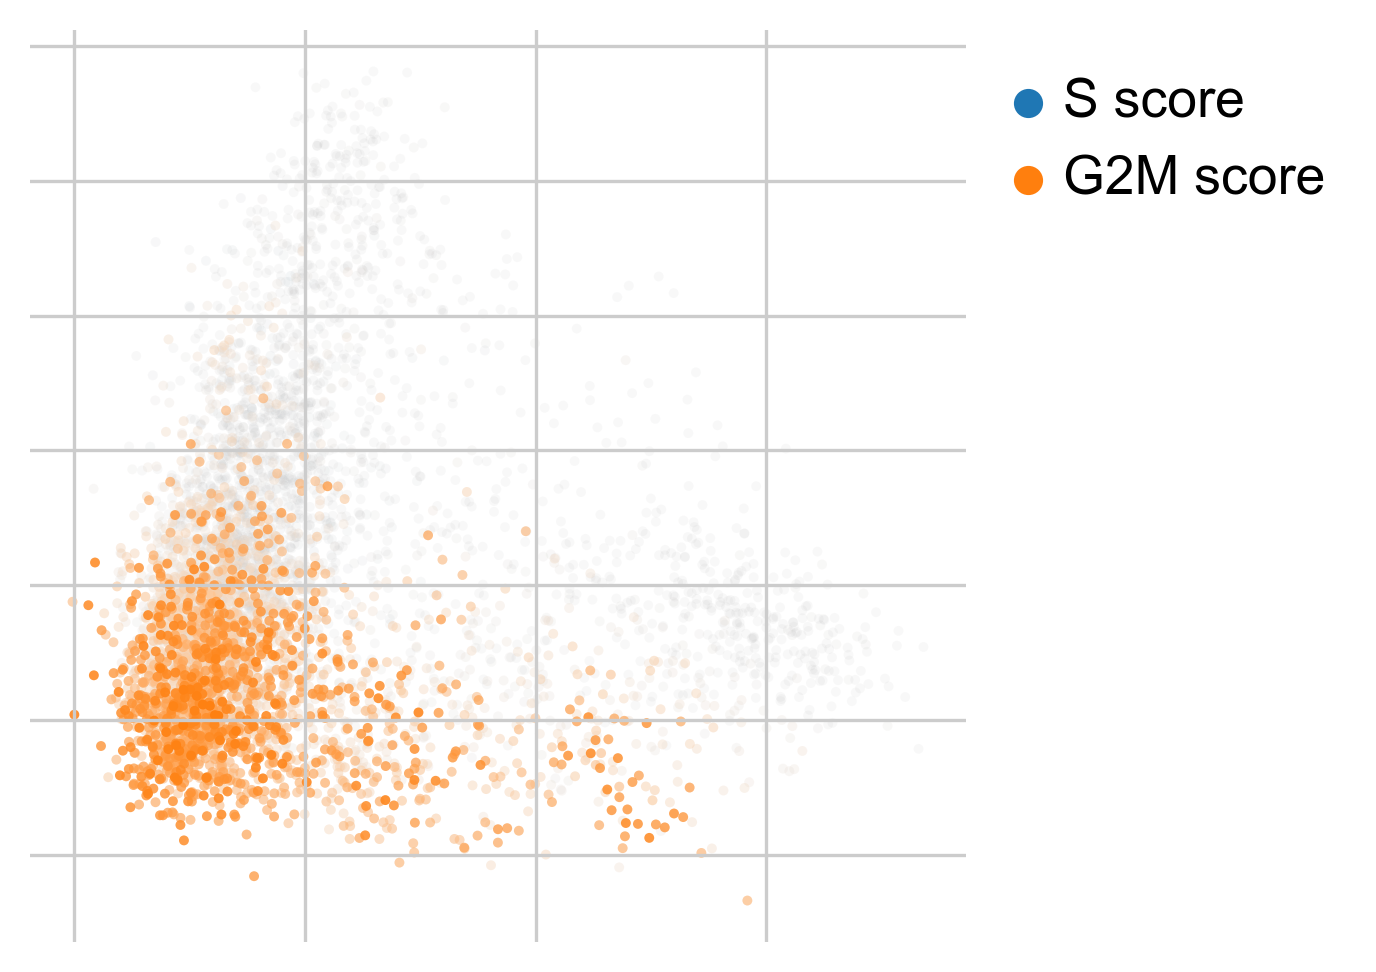

In [18]:
scv.tl.score_genes_cell_cycle(adata)
scv.pl.scatter(adata, color_gradients=['S_score','G2M_score'], smooth=True, perc=[5, 95])

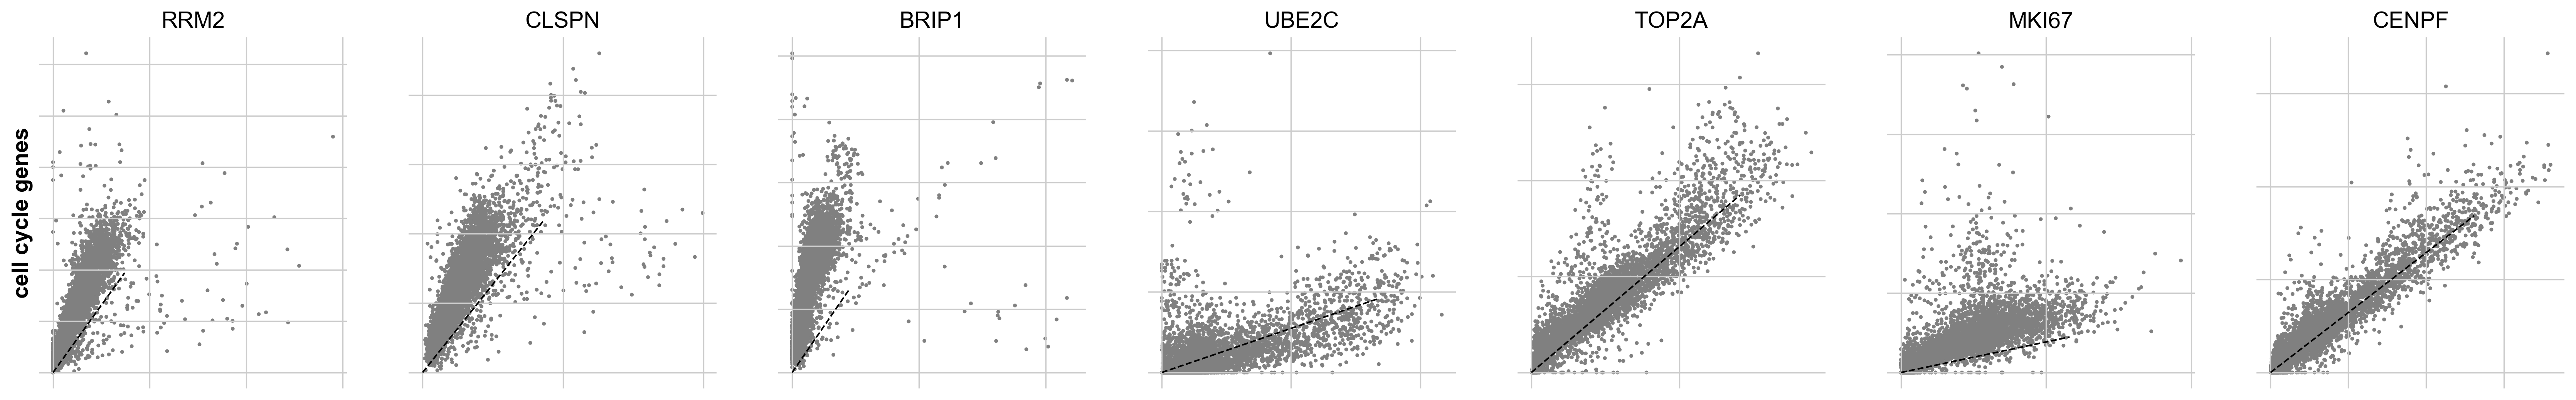

In [27]:
kwargs = dict(frameon=False, ylabel='cell cycle genes')
scv.pl.scatter(adata, list(s_genes[:4]) + list(g2m_genes[:4]), **kwargs)

computing terminal states
    identified 0 region of root cells and 1 region of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)


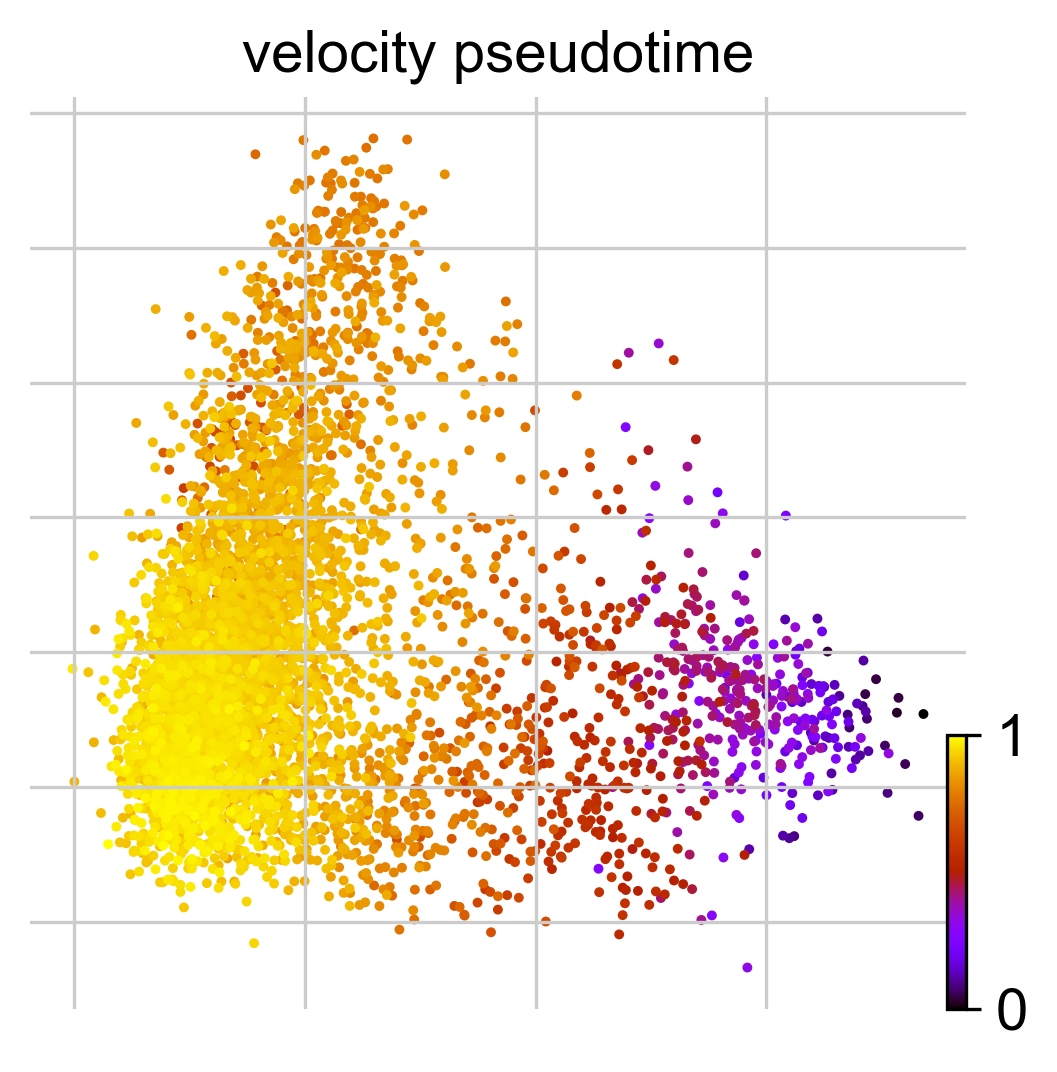

In [29]:
scv.tl.velocity_pseudotime(adata)
scv.pl.scatter(adata, color='velocity_pseudotime', cmap='gnuplot')